In [1]:
import os
import sys

global SRC
SRC = '/home/ubuntu/uncover-ml'
os.environ['UNCOVERML_SRC'] = SRC
sys.path.append(os.path.join(SRC, 'uncoverml'))

('k_15v5', 'U_TH_15', 'dem_foc2', 'er_depg', 'U_15v1', 'Clim_Prescott_LindaGregory', 'gg_clip', 'tpi_300')
('k_15v5', 'U_TH_15', 'U_15v1', 'er_depg', 'dem_foc2', 'gg_clip', 'Clim_Prescott_LindaGregory', 'tpi_300')
('k_15v5', 'U_TH_15', 'dem_foc2', 'er_depg', 'U_15v1', 'Clim_Prescott_LindaGregory', 'gg_clip', 'tpi_300')
('k_15v5', 'U_TH_15', 'er_depg', 'U_15v1', 'dem_foc2', 'Clim_Prescott_LindaGregory', 'gg_clip', 'tpi_300')
('tpi_300', 'gg_clip', 'er_depg', 'dem_foc2', 'U_TH_15', 'U_15v1', 'Clim_Prescott_LindaGregory', 'k_15v5')
('k_15v5', 'er_depg', 'U_15v1', 'dem_foc2', 'U_TH_15', 'Clim_Prescott_LindaGregory', 'tpi_300', 'gg_clip')
('k_15v5', 'U_TH_15', 'dem_foc2', 'er_depg', 'U_15v1', 'Clim_Prescott_LindaGregory', 'gg_clip', 'tpi_300')
('k_15v5', 'U_TH_15', 'U_15v1', 'er_depg', 'dem_foc2', 'gg_clip', 'Clim_Prescott_LindaGregory', 'tpi_300')
('tpi_300', 'gg_clip', 'Clim_Prescott_LindaGregory', 'U_15v1', 'er_depg', 'dem_foc2', 'U_TH_15', 'k_15v5')
('tpi_300', 'Clim_Prescott_LindaGrego

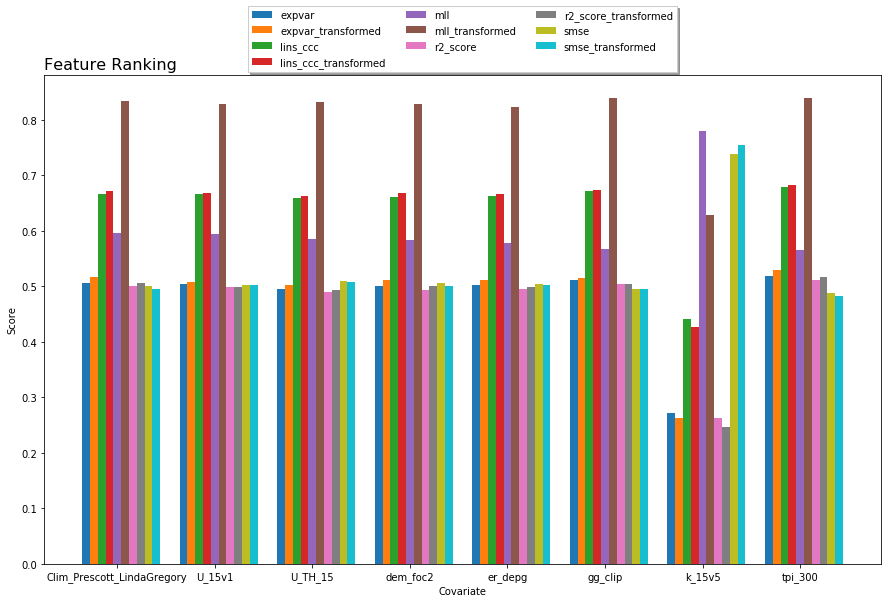

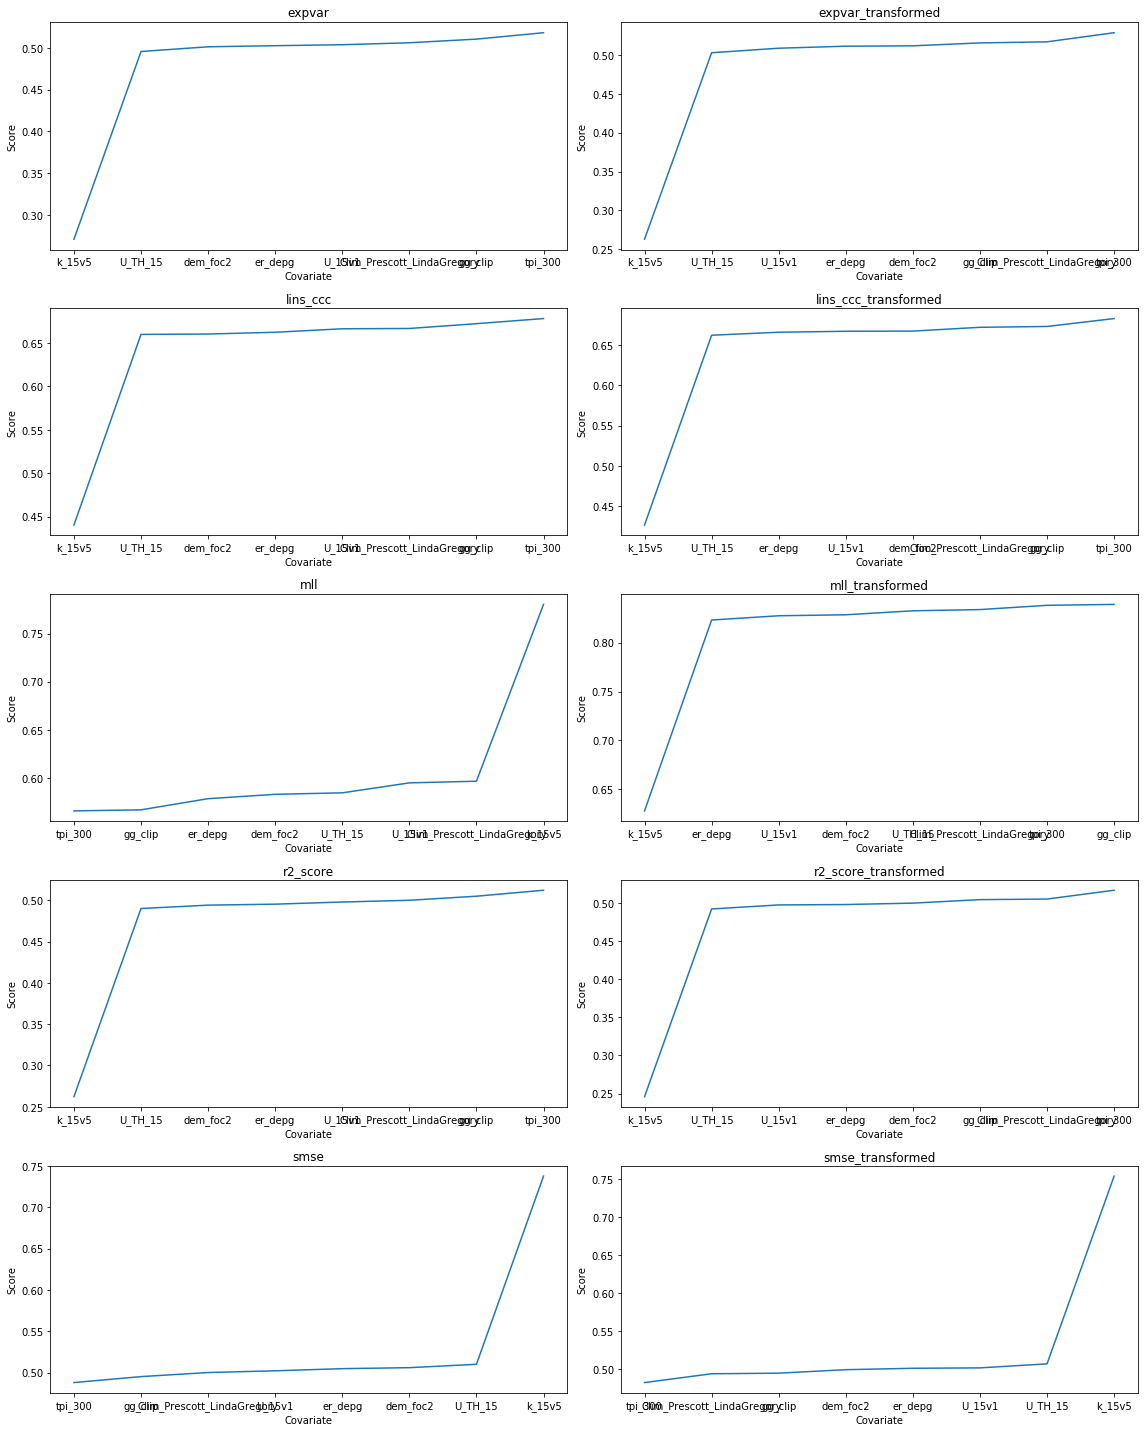

In [28]:
import os
import json
import math
from collections import defaultdict

import matplotlib.pyplot as plt

from uncoverml import diagnostics


# Path to feature ranking scores file.
path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 
                    'precomputed', 'learn', 'sirsam_Na_randomforest_featureranks.json')

feature_ranks_figure = diagnostics.plot_feature_ranks(path)

subplot_width, subplot_height = 8, 4

with open(path) as f:
    fr_dict = json.load(f)

covariates = sorted([os.path.split(c)[1] for c in next(iter(fr_dict['ranks'].values()))])
metrics = fr_dict['ranks'].keys()

# Get scores grouped by metric and ordered by score
scores = defaultdict(list)
for m in metrics:
    for cp, s in list(zip(fr_dict['ranks'][m], fr_dict['scores'][m])) :
        c = os.path.split(cp)[1]
        scores[m].append((c, s))
    scores[m].sort(key=lambda a: a[1])

rows = math.ceil(len(metrics) / 2)
cols = 2
figsize = cols * subplot_width, rows * subplot_height
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=figsize)
for x in range(axs.shape[0]):
    for y in range(axs.shape[1]):
        axs[x, y].set(xlabel='Covariate', ylabel='Score')
        
for i, m in enumerate(metrics):
    x = math.floor(i / cols)
    y = i - cols * x
    ind = x, y
    z = list(zip(*scores[m]))
    print(z[0])
    # axs[ind].plot(range(len(z[0])), z[1])
    axs[ind].plot(z[0], z[1])
    axs[ind].set_title(m)
    
fig.tight_layout()



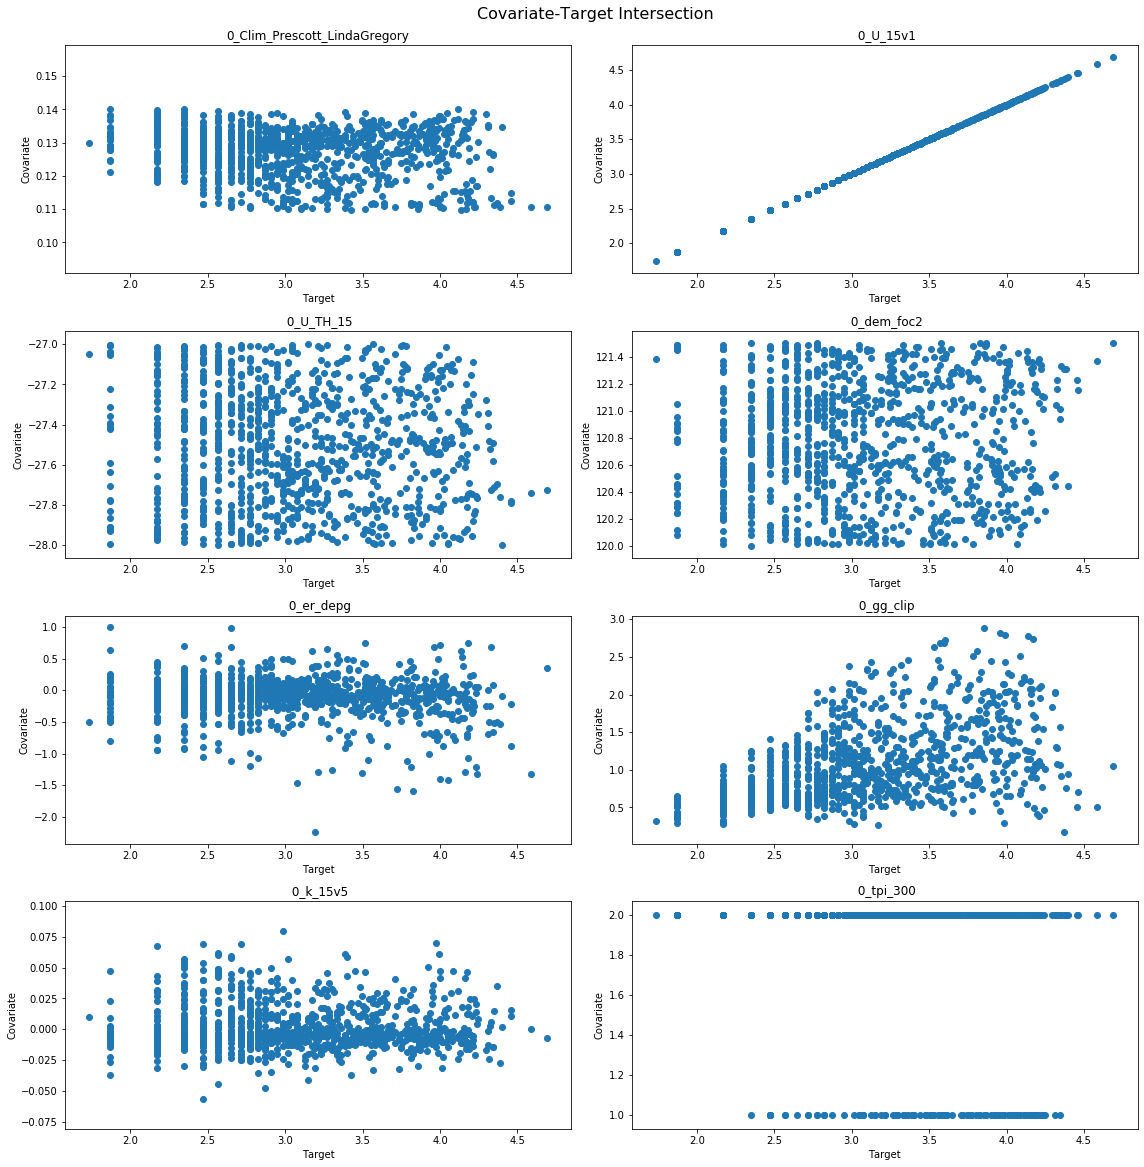

In [3]:
import os

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

intersection = diagnostics.plot_covariates_x_targets(path, cols=2)
    

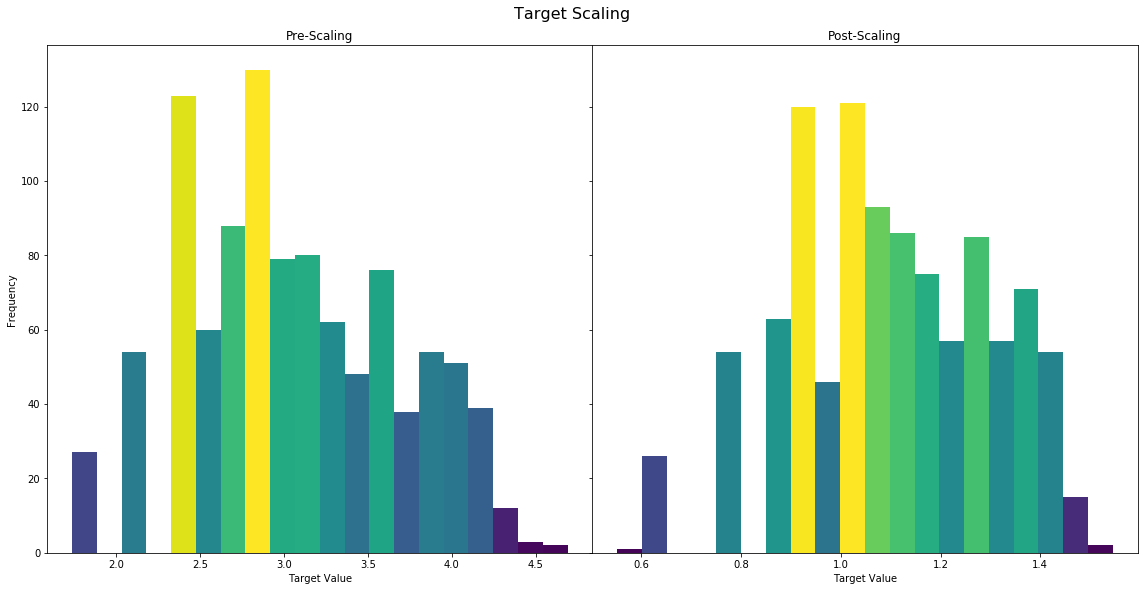

In [4]:
import os

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 'out',
                    'sirsam_Na_randomforest_transformed_targets.csv')

target_histograms = diagnostics.plot_target_scaling(path)


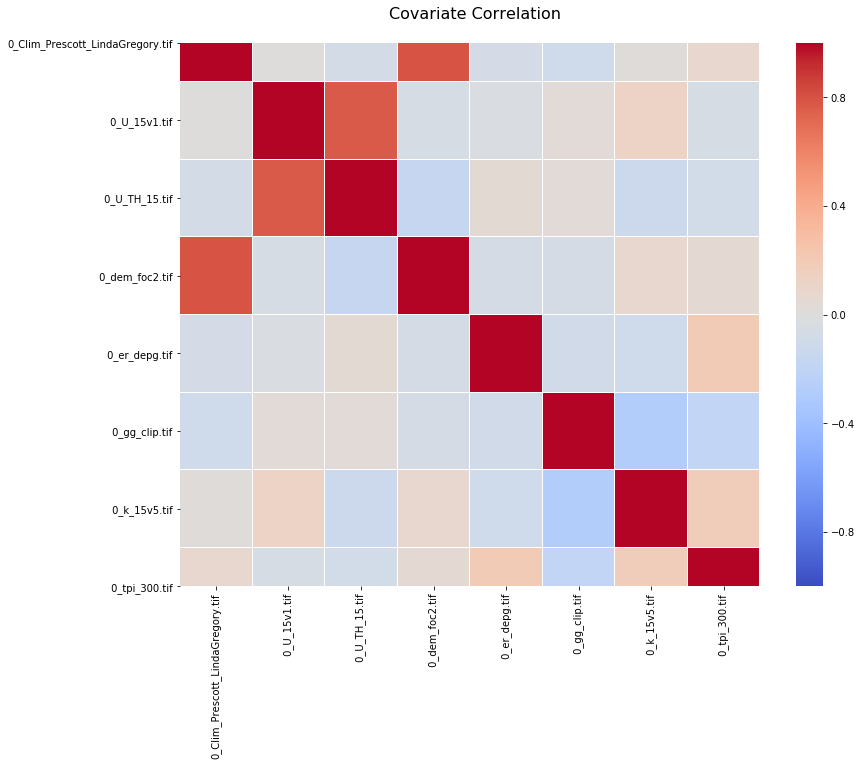

In [5]:
import os
import csv

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

correlation = diagnostics.plot_covariate_correlation(path)


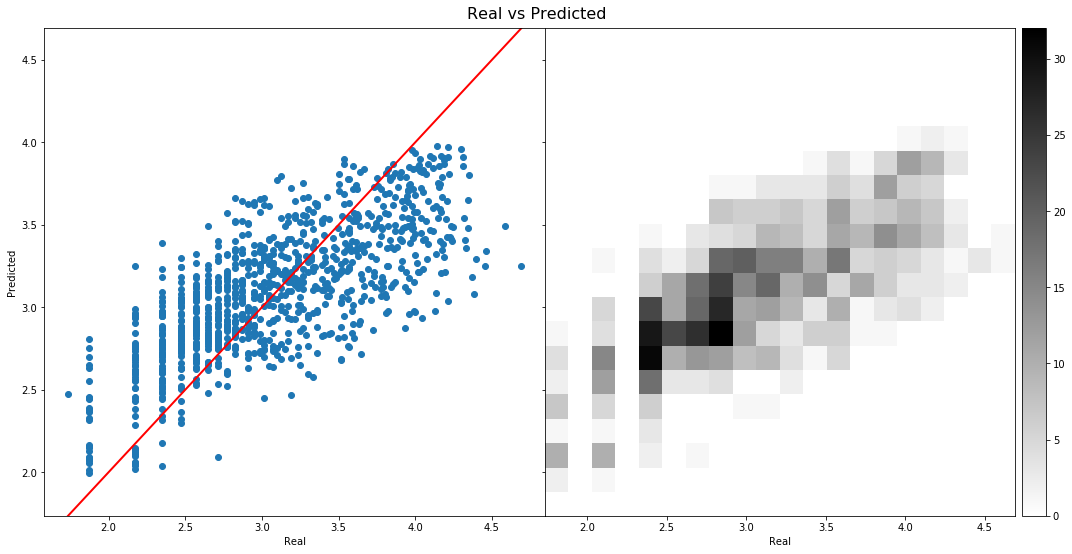

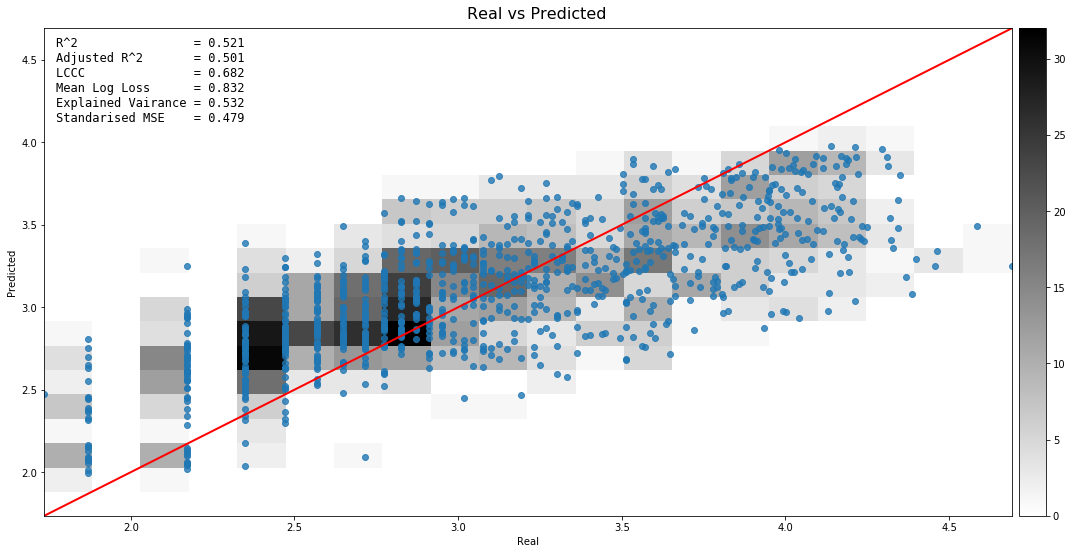

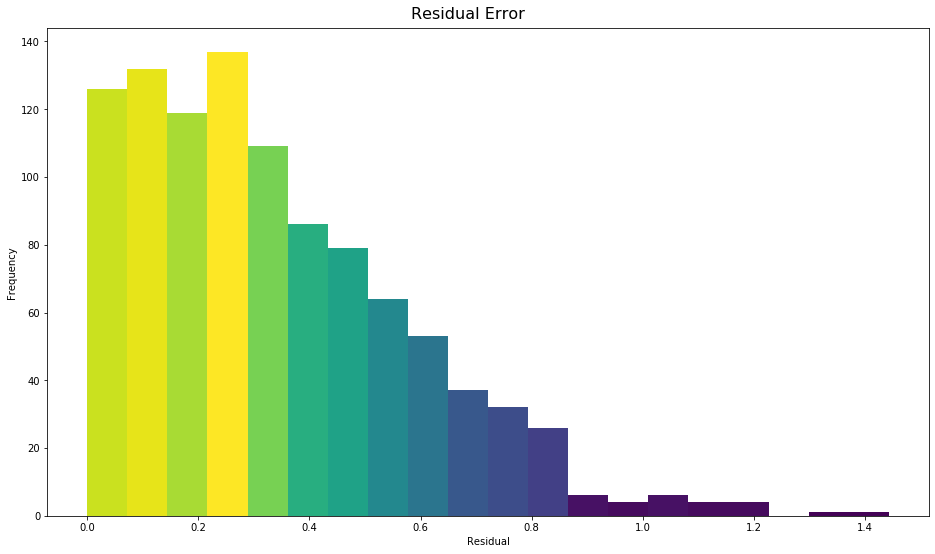

In [6]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

from uncoverml import diagnostics


rc_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_rawcovariates.csv')
pred_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_prediction.tif')
scores_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_crossval_scores.json')

real_vs_pred = diagnostics.plot_real_vs_pred(rc_path, pred_path)

# Can optionally include scores and overlay 2D histogram on scatter plot
real_vs_pred = diagnostics.plot_real_vs_pred(rc_path, pred_path, scores_path=scores_path, overlay=True)

residuals = diagnostics.plot_residual_error(rc_path, pred_path)

  

